| Faculdade | Curso | Disciplina | Professor | Data |
| :- | :- | :- | :-| :-: |
|Estácio | ADS | Big Data e Python | Prof. Fabio Oliveira | Novembro - 2024 |


<H1> Análise de Dados

### Mercado Bom Gosto

O Mercadinho Bom Gosto é um comércio de pequeno porte que acumula mais de uma década de atuação no mercado. Ao longo desse período, o estabelecimento se destacou pela sua capacidade de adaptação frente às diversas transformações ocorridas no setor varejista, consolidando-se como um exemplo de negócio local bem-sucedido. Desde o início de suas atividades, o Mercadinho Bom Gosto buscou se diferenciar, priorizando tanto a diversidade de produtos quanto a qualidade no atendimento ao cliente. Essa postura estratégica contribuiu para o desenvolvimento de uma relação sólida e duradoura com seus consumidores, baseada na confiança e na satisfação. 

A ampla variedade de produtos disponibilizados pelo Mercadinho Bom Gosto atende às necessidades e preferências da comunidade, abrangendo desde itens básicos do dia a dia até produtos diferenciados, que agregam valor à experiência de compra. Além disso, o atendimento personalizado é um dos pilares do sucesso do estabelecimento. A equipe de colaboradores, devidamente treinada e motivada, dedica-se a conhecer as preferências dos clientes e a oferecer um serviço que ultrapassa a mera transação comercial, promovendo uma sensação de acolhimento e cuidado. Esse diferencial é essencial em um mercado cada vez mais competitivo, onde o contato próximo com o cliente e o atendimento de qualidade fazem a diferença. 

 Outro aspecto relevante é a experiência de compra proporcionada aos consumidores, que encontram um ambiente acolhedor, organizado e de fácil navegação. Essa estrutura contribui para que os clientes sintam-se à vontade ao realizar suas compras, fortalecendo o vínculo com o estabelecimento e incentivando a recorrência. A fidelidade dos clientes, portanto, é um reflexo da constante preocupação do Mercadinho Bom Gosto em se atualizar e atender às expectativas da comunidade. 

 Assim, o Mercadinho Bom Gosto transcendeu a simples função de um comércio local, tornando-se um ponto de referência para os moradores da região. Ao aliar qualidade de produtos, atendimento personalizado e um ambiente agradável, o estabelecimento consolidou-se como um modelo de negócio local que valoriza as relações comunitárias e reforça a importância do comércio de bairro, destacando-se como um exemplo de resiliência e sucesso em um cenário de constantes desafios. 

A principal dor do meu cliente, um mercado de pequeno porte, está na dificuldade de prever as flutuações nas vendas ao longo do ano, o que afeta diretamente seu planejamento de estoque, equipe e promoções. Sem uma visão clara da sazonalidade, o mercado pode enfrentar períodos de excesso de estoque, resultando em produtos encalhados e aumento de custos, ou, ao contrário, a falta de produtos em épocas de alta demanda, prejudicando as vendas e a satisfação dos clientes. Com uma análise de dados que revele padrões sazonais, o cliente poderá ajustar suas estratégias com mais precisão, melhorando a gestão de recursos e garantindo uma operação mais eficiente e lucrativa.

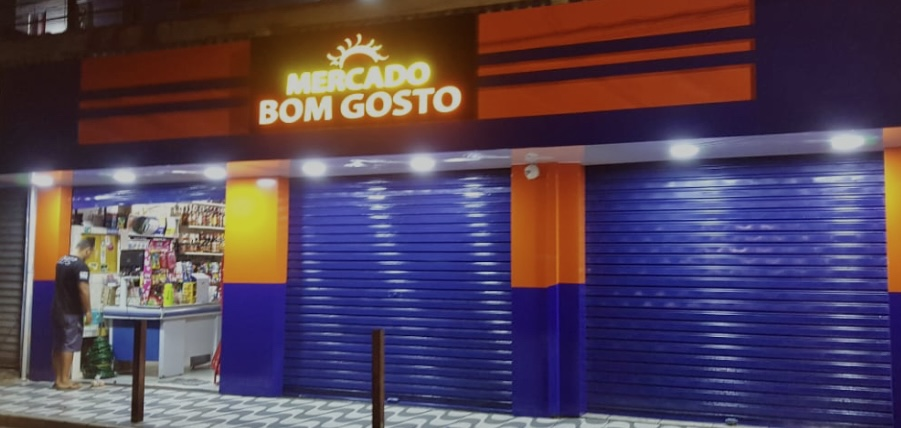

In [4]:
from IPython.display import Image, display

# Caminho da imagem
imagem = "/Users/macbookpro/Downloads/IMG_9124.jpg"

# Exibindo a imagem
display(Image(filename=imagem))

### Importando as bibliotecas

In [27]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm


In [7]:
Historico_Resultados = pd.read_excel('/Users/macbookpro/Downloads/banco de dados mercado.xlsx')

### Eliminação de células nulas na base de dados.

In [8]:
Historico_Resultados.dropna()

,DATA,NOME DO PRODUTO,QUANTIDADE,VALOR UN,TOTAL
0,17/04/2024,CHA MATE LEAO SACHE LIMAO,10.0,5.99,59.90
1,30/06/2024,CHA MATTE LEAO NAT AGRANEL 100G,15.0,5.49,82.35
2,2024-07-01 00:00:00,CHA MATTE LEAO NAT AGRANEL 250G,8.0,7.99,63.92
3,23/05/2024,CHA PRETO COM CANELA LEAO,5.0,4.49,22.45
4,2023-11-10 00:00:00,CHA PRETO ICE LEAO PESSEGO 450ML,12.0,2.99,35.88
...,...,...,...,...,...
1034,29/06/2024,BOLACHA MARILAN LIM/CHOC,13.0,1.69,21.97
1035,2024-10-07 00:00:00,BOLACHA MOUSSE MORANGO C/,23.0,2.29,52.67
1036,19/06/2024,BOLACHA PANCO CHOCOLATE,10.0,2.99,29.90
1037,17/05/2024,BOLACHA PANCO TRUFADO,8.0,2.79,22.32


In [9]:
data = Historico_Resultados.dropna()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1035 entries, 0 to 1038
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATA             1035 non-null   object 
 1   NOME DO PRODUTO  1035 non-null   object 
 2   QUANTIDADE       1035 non-null   float64
 3   VALOR UN         1035 non-null   float64
 4   TOTAL            1035 non-null   float64
dtypes: float64(3), object(2)
memory usage: 48.5+ KB


In [11]:
data.describe()

,QUANTIDADE,VALOR UN,TOTAL
count,1035.000000,1035.000000,1035.000000
mean,12.435749,6.885807,86.139681
std,6.600252,10.211379,161.205759
min,2.000000,0.490000,2.450000
25%,8.000000,2.490000,24.950000
50%,11.000000,4.290000,47.190000
75%,15.000000,6.990000,89.900000
max,30.000000,120.000000,2400.000000


A média do Total de Vendas é: 86.140


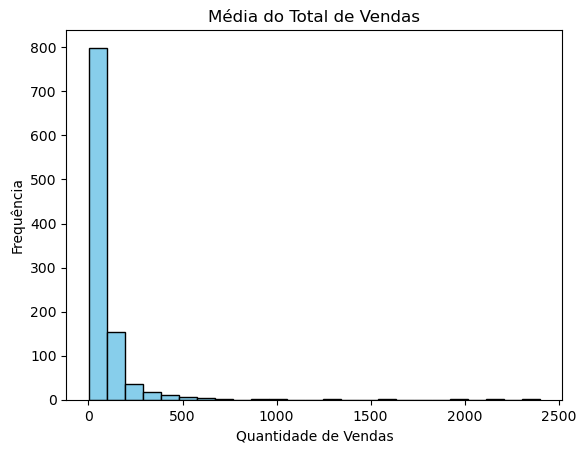

In [12]:
# Para exibir um histograma da coluna 'TOTAL' de vendas
plt.hist(data['TOTAL'], bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Frequência')
plt.title('Média do Total de Vendas')

# Calcula e exibe a média das vendas dos clientes
media_total = data['TOTAL'].mean()
print(f"A média do Total de Vendas é: {media_total:.3f}")

plt.show()


### Analisando a média do Total de vendas 
A barra mais alta do gráfico está próxima de 0 no eixo X, indicando que a maioria das vendas totais é de valores relativamente baixos. Isso sugere que, em grande parte dos registros, o mercado vendeu pequenas quantidades em comparação aos valores mais altos observados.
A média das vendas foi calculada como 86.140. Esse valor médio está muito próximo dos intervalos onde a maioria das vendas se concentra, mas, como o gráfico mostra, há uma dispersão significativa em valores mais baixos e em alguns extremos à direita, o que afeta a interpretação dessa média.

Esse gráfico indica que o mercado realiza a maioria das suas vendas em valores baixos, com poucas transações de alto valor. Esse comportamento é típico em pequenos comércios, onde as compras geralmente são de baixo valor. Essa informação pode ser útil para entender a sazonalidade e otimizar o estoque e as promoções em torno de produtos que costumam ter maior saída em valores baixos, ao invés de focar em grandes vendas, que são mais raras.

Se a maioria das barras estiver à esquerda da média e se afunilando em direção a valores mais altos, isso indica que a maioria das vendas são menores que a média.

A media do Valor Unitário é: 6.886


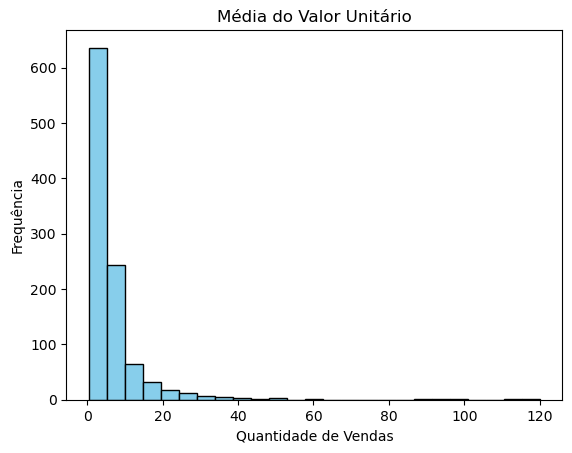

In [13]:

# Para exibir um histograma da coluna 'TOTAL' de vendas
plt.hist(data['VALOR UN'], bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Frequência')
plt.title('Média do Valor Unitário')

# Calcula e exibe a média das vendas dos clientes
media_total = data['VALOR UN'].mean()
print(f"A media do Valor Unitário é: {media_total :.3f}")

plt.show()

### Analisando a média do valor unitário 

Alta frequência de valores baixos: A maioria das barras está concentrada na parte esquerda do gráfico, próximo a 0 no eixo X. Isso indica que a maior parte dos produtos vendidos tem um valor unitário baixo, abaixo de 10 unidades monetárias, o que é comum em mercados de pequeno porte, onde muitos produtos básicos são acessíveis.

Assimetria positiva: O gráfico é assimétrico e possui uma "cauda" que se estende à direita, mostrando que há uma quantidade reduzida de vendas com valores unitários mais altos (acima de 20). Esses valores são menos frequentes, indicando que produtos mais caros são vendidos com menos frequência.

o valor médio de 6,886 reflete a tendência do mercado em vender produtos de baixo valor unitário, o que é típico para mercados de bairro que oferecem produtos do dia a dia para a comunidade local.

A média da Quantidade é: 12.436


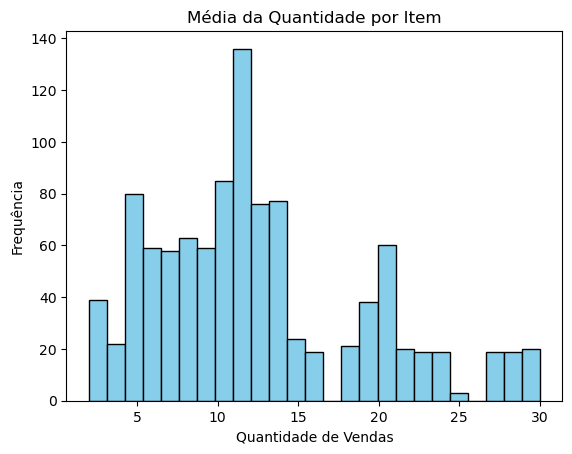

In [14]:
# Exibe um histograma da coluna 'TOTAL' de vendas
plt.hist(data['QUANTIDADE'], bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Frequência')
plt.title('Média da Quantidade por Item')

# Calcula e exibe a média das vendas dos clientes
media_total = data['QUANTIDADE'].mean()
print(f"A média da Quantidade é: {media_total :.3f}")

plt.show()

### Analizando a média de quantidade

A média indica que, em média, os clientes compram aproximadamente 12 unidades de produtos por transação.
Isso sugere que os clientes frequentemente compram múltiplas unidades, o que pode ser característico de compras em quantidade maior.

O gráfico revela um padrão de compra onde uma quantidade considerável de clientes compra entre 5 e 15 unidades, mas há também uma proporção que compra mais do que isso. A média de 12 unidades sugere que o mercado atende a uma clientela mista: tanto clientes que fazem compras em pequenas quantidades quanto aqueles que compram em maior volume, possivelmente para abastecimento. Essa informação pode ser útil para estratégias de estoque e ofertas de pacotes de produtos.








Periodo
Verão        5176
Outono       9505
Inverno      8894
Primavera    9372
Name: Vendas, dtype: int64


/var/folders/92/n5q3jrd15mq1fx9dcrsxjnjh0000gn/T/ipykernel_5668/1529230412.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vendas_por_periodo = df.groupby('Periodo')['Vendas'].sum()


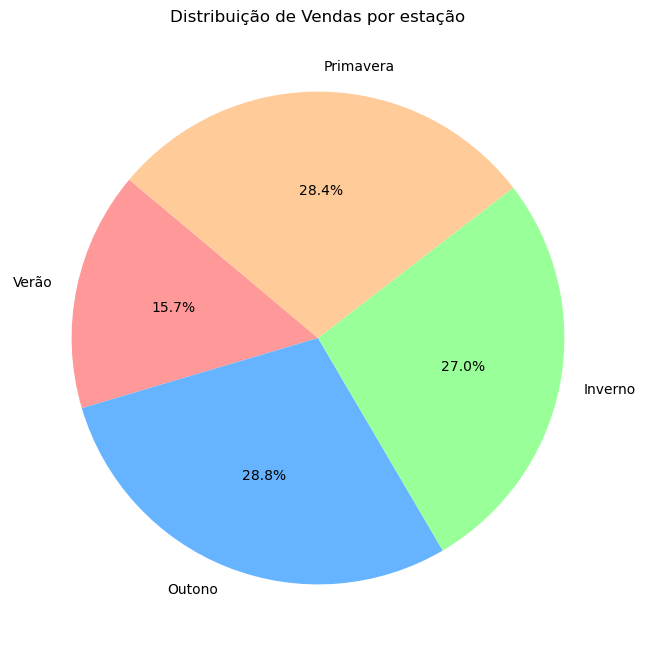

In [16]:

# Exemplo de DataFrame com dados de vendas
dados = {
    'Data': pd.date_range(start='2023-10-01', periods=365, freq='D'),
    'Vendas': [abs(int(100 + 20 * np.sin(x/30))) for x in range(365)]  # Exemplo de padrão de vendas
}
df = pd.DataFrame(dados)

# Adicionando uma coluna de 'Período' (por exemplo, estação do ano)
df['Mes'] = df['Data'].dt.month
df['Periodo'] = pd.cut(df['Mes'], bins=[0, 3, 6, 9, 12], labels=['Verão', 'Outono', 'Inverno', 'Primavera'], right=False)

# Agrupando os dados por 'Período' e somando as vendas
vendas_por_periodo = df.groupby('Periodo')['Vendas'].sum()

# Exibindo os resultados
print(vendas_por_periodo)

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(vendas_por_periodo, labels=vendas_por_periodo.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribuição de Vendas por estação')
plt.show()


### explicando o código

    
**pd.date_range()** :     Cria uma sequência de datas que começa em 2023-10-01 e vai por 365 dias, com uma frequência diária (freq='D').

**A fórmula 100 + 20 * np.sin(x/30)**      cria um padrão oscilatório que simula a variação sazonal nas vendas. 

**A função np.sin()**     cria uma curva senoidal que, junto com os outros parâmetros, cria flutuações periódicas.

**abs(int(...))**:     Transforma o valor em um número inteiro positivo.

**df['Mes'] = df['Data'].dt.month**:     Extrai o mês de cada data e cria uma coluna chamada 'Mes'.

**pd.cut()**:     Agrupa os meses em intervalos para criar a coluna 'Periodo':

**bins=[0, 3, 6, 9, 12]**:     Define os intervalos de meses que correspondem às estações.

**labels=['Verão', 'Outono', 'Inverno', 'Primavera']**:    Define os rótulos dos períodos.

**right=False**:     O intervalo inclui o limite inferior, mas exclui o superior (por exemplo, meses 1, 2 e 3 são agrupados como 'Verão').


**df.groupby('Periodo')['Vendas'].sum()**:     Agrupa as linhas do DataFrame pela coluna 'Periodo' e soma as vendas para cada período

### RESUMO

Esse código cria um DataFrame com dados de vendas diárias, agrupa as vendas em estações do ano, soma as vendas por estação e as visualiza em um gráfico de pizza. Isso ajuda a entender a distribuição das vendas ao longo das estações.
